AUDIO
======

In [1]:
import wave, struct
from functools import partial

import numpy as np
import scipy.signal as sg
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
%matplotlib inline

import seaborn as sns
from pprint import pprint

from scipy.io import wavfile

sns.set_context("talk")
sns.set_style('white', {'axes.facecolor': 'none'})

/home/boylea/.virtualenvs/dsp/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def plot(x, y, xlabel='', ylabel=''):
    plt.plot(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sns.despine()
    ax = plt.gca()
    fig = plt.gcf()
    return ax, fig

float64


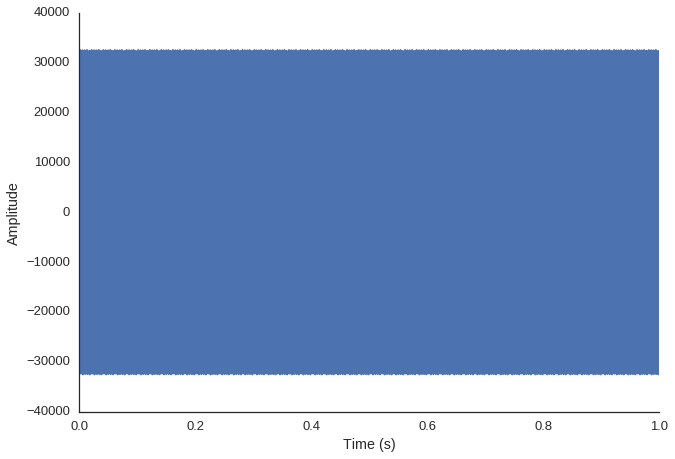

In [3]:
# mpl.rcParams.update(inline_rc)

fs = 44100
step_size = 1./fs
t = np.arange(0.0, 1.0, step_size)
freq0 = 2000
freq1 = 750
twotone = np.sin(t*freq0*2*np.pi) + np.sin(t*freq1*2*np.pi)

print twotone.dtype
# output = np.zeros((len(twotone),2))
# output[:,0] = twotone
# output[:,1] = twotone
# wavfile.write('audio/twotone.wav', fs, output)

scaled = twotone*(2**14)
scaled = scaled.astype('int')
# packed = map(partial(struct.pack,'h'), scaled)
# scaled = list(scaled)
packed = [struct.pack('h', i) for i in scaled]
packed = ''.join(packed)

ax, fig = plot(t, scaled, 'Time (s)', 'Amplitude')
# plt.ylim((-2.2,2.2))
plt.savefig('img/twotone_timeseries.png', transparent=True)

#scipy.io.wavfile doesn't seem to work... but wave does
output_file = wave.open('audio/twotone.wav','wb')
output_file.setparams((1, 2, fs, 0, 'NONE', 'not compressed'))
output_file.writeframes(packed)
output_file.close()

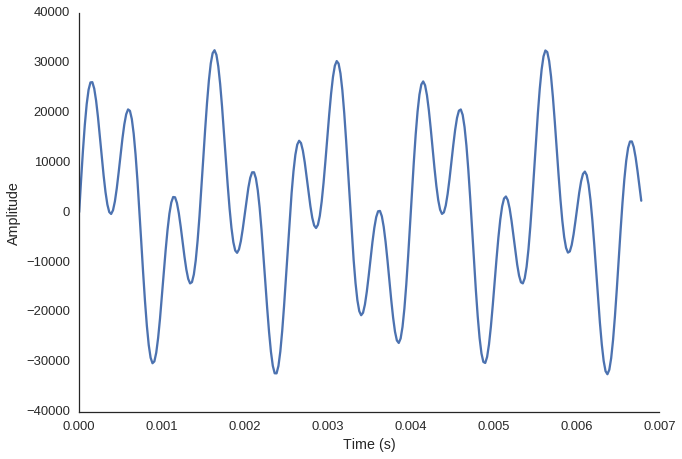

In [4]:
zoom_section = scaled[:300]
zoom_t = t[:300]
ax, fig = plot(zoom_t, zoom_section, 'Time (s)', 'Amplitude')
plt.savefig('img/twotone_timeseries_zoom.png', transparent=True)

(0, 5000)

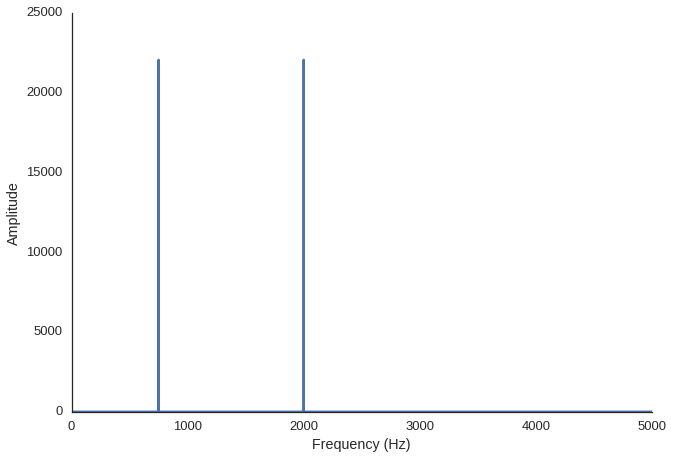

In [5]:
spectrum = np.fft.rfft(twotone)
freqs = np.fft.rfftfreq(len(twotone), 1./fs)
# print spectrum.shape, freqs.shape, freqs[0], freqs[-1]

ax, fig = plot(freqs, np.sqrt(spectrum.real**2 + spectrum.imag**2), 'Frequency (Hz)', 'Amplitude')
plt.xlim((0,5000))

# fig.savefig('img/twotone_fft.png', transparent=True)
# fig.savefig('img/twotone_fft_zoom.png', transparent=True)

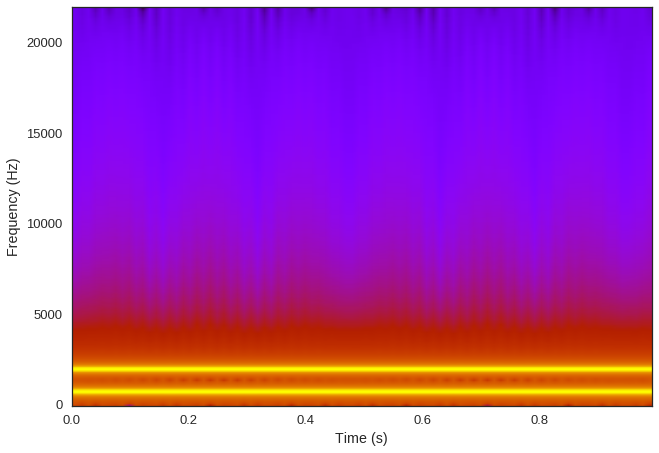

In [6]:
plt.specgram(twotone, Fs=fs, NFFT=512, noverlap=0, cmap='gnuplot');
ax = plt.gca()
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.autoscale(tight=True)

fig = plt.gcf()
fig.savefig('img/twotone_spectrogram.png', transparent=True)

21739 (25595,)


/home/boylea/.virtualenvs/dsp/lib/python2.7/site-packages/scipy/io/wavfile.py:179: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


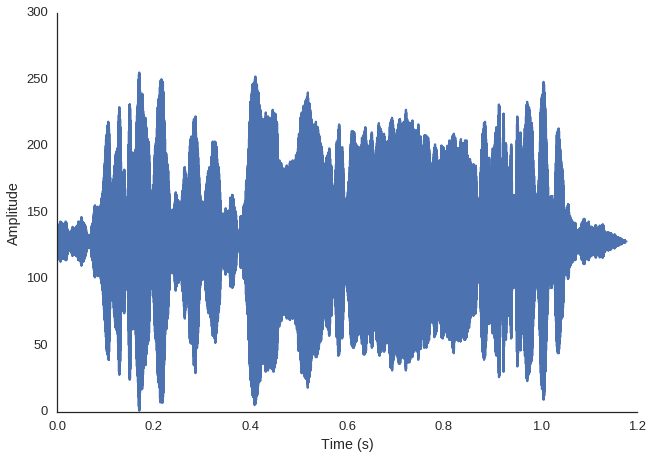

In [7]:
# fs, whistle = wavfile.read('tos-intercom.wav')
fs, whistle = wavfile.read('audio/whistle.wav')
print fs, whistle.shape
t = np.linspace(0,float(len(whistle))/fs, len(whistle))

ax, fig = plot(t, whistle, 'Time (s)', 'Amplitude')

plt.savefig('img/whistle.png', transparent=True)

(12798,) (12798,) 0.0 10869.0753272


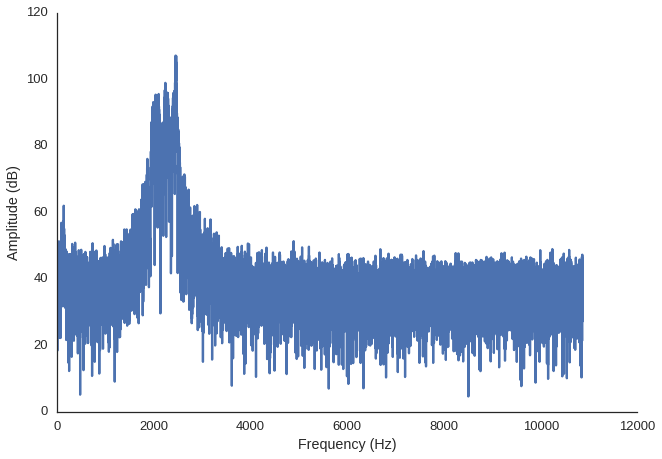

In [8]:
spectrum = np.fft.rfft(whistle)
freqs = np.fft.rfftfreq(len(whistle), 1./fs)
print spectrum.shape, freqs.shape, freqs[0], freqs[-1]
spectrum[0] = 0
spectrum = 20 * np.log10(spectrum)

ax, fig = plot(freqs, abs(spectrum), 'Frequency (Hz)', 'Amplitude (dB)')
fig.savefig('img/whistle_spectrum.png', transparent=True)

In [9]:
passband = 100. #Hz
stopband= 4000.
nyq = 0.5 * fs

order, normalized_cutoff = sg.buttord([1000./nyq, 4000./nyq], [10./nyq, 5000./nyq], 3, 40)
print 'order', order, 'cutoff', normalized_cutoff
b, a = sg.butter(order, normalized_cutoff, btype='bandpass')

band_passed = np.zeros_like(whistle)
print whistle.shape
band_passed = sg.lfilter(b, a, whistle)
print band_passed.shape

order 11 cutoff [ 0.09198811  0.36804216]
(25595,)
(25595,)


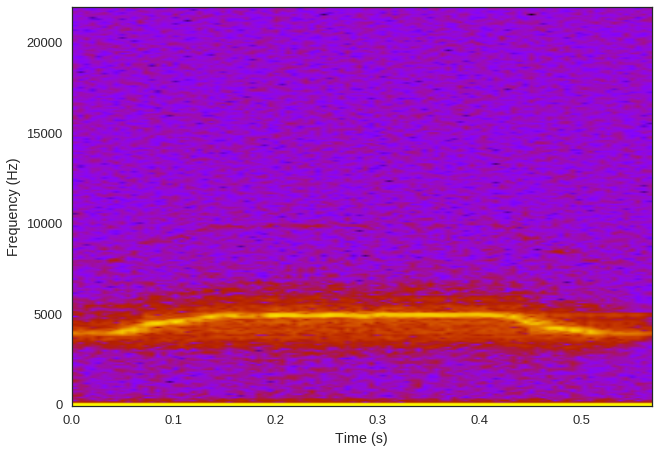

In [15]:
plt.specgram(whistle, Fs=fs, cmap='gnuplot', NFFT=512, noverlap=256);
plt.autoscale(tight=True)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.savefig('img/whistle_spectrogram.png', transparent=True);

Sample rate 44100
(100097,) (100097,) 0.0 22050.0


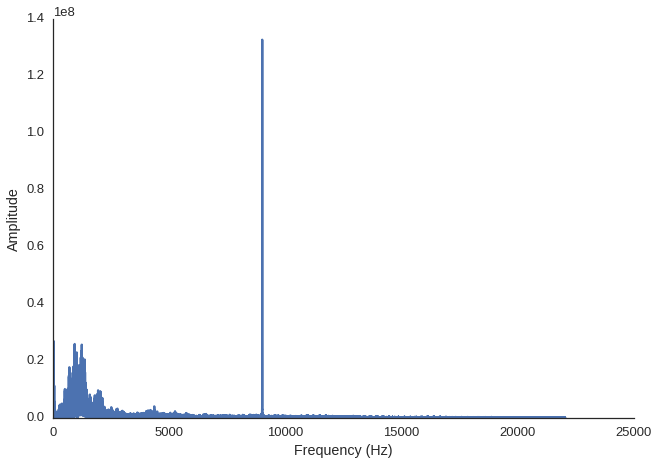

In [11]:
fs, audio = wavfile.read('audio/distorted_bender.wav')
print 'Sample rate', fs

channel = audio[:,0]
spectrum = np.fft.rfft(channel)
freqs = np.fft.rfftfreq(len(channel), 1./fs)
print spectrum.shape, freqs.shape, freqs[0], freqs[-1]
spectrum[0] = 0

ax, fig = plot(freqs, abs(spectrum), 'Frequency (Hz)', 'Amplitude')

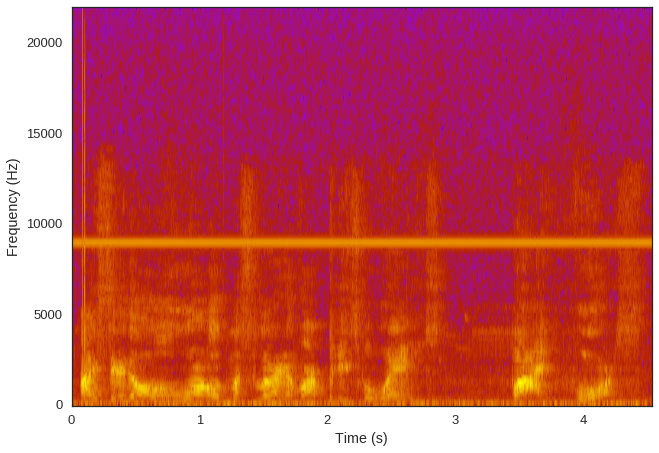

In [16]:
plt.specgram(channel, Fs=fs, cmap='gnuplot');
plt.autoscale(tight=True)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
ax = plt.gca()

fig = plt.gcf()
fig.savefig('img/speech_spectrogram.png', transparent=True)

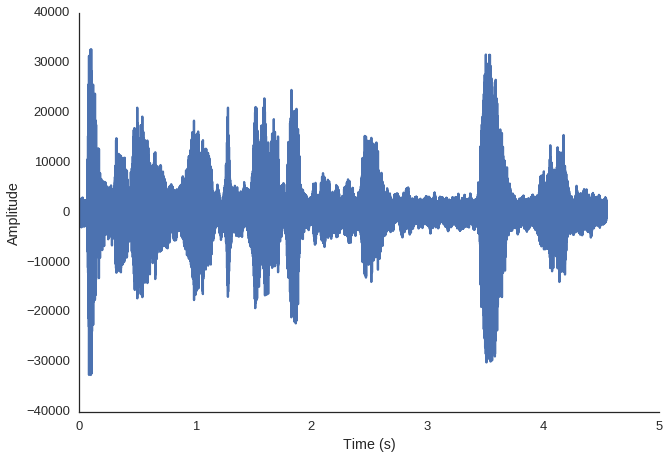

In [13]:

t = np.linspace(0,float(len(audio))/fs, len(audio))
plot(t, audio[:,0], 'Time (s)', 'Amplitude')
fig= plt.gcf()
fig.savefig('img/bender.png', transparent=True)

Filtering
-----------
[scipy cookbook](http://wiki.scipy.org/Cookbook/FIRFilter)
[scipy signal API](http://docs.scipy.org/doc/scipy/reference/signal.html)

order 29


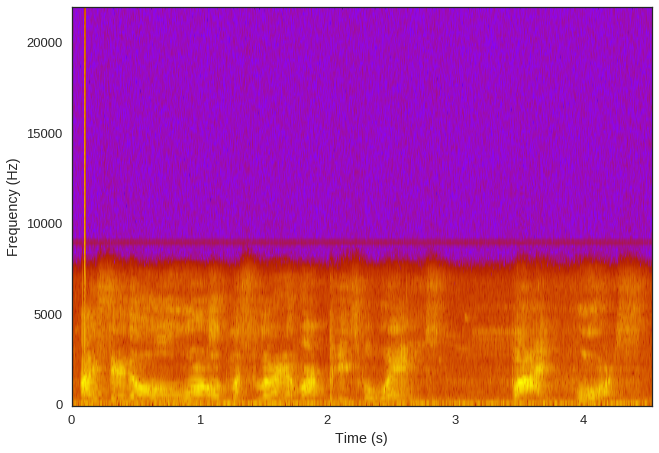

In [41]:
passband = 7000. #Hz
stopband= 8000.
nyq = 0.5 * fs
order, normalized_cutoff = sg.buttord(passband/nyq, stopband/nyq, 3, 40)
print 'order', order
b, a = sg.butter(order, normalized_cutoff, btype='low')

low_passed = np.zeros_like(audio)
low_passed[:,0] = sg.lfilter(b, a, audio[:,0])
low_passed[:,1] = sg.lfilter(b, a, audio[:,1])

plt.specgram(low_passed[:,0], Fs=fs, cmap='gnuplot');
plt.autoscale(tight=True)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

wavfile.write('audio/filtered_bender.wav', fs, low_passed)

fig = plt.gcf()
fig.savefig('img/filtered.png', transparent=True)

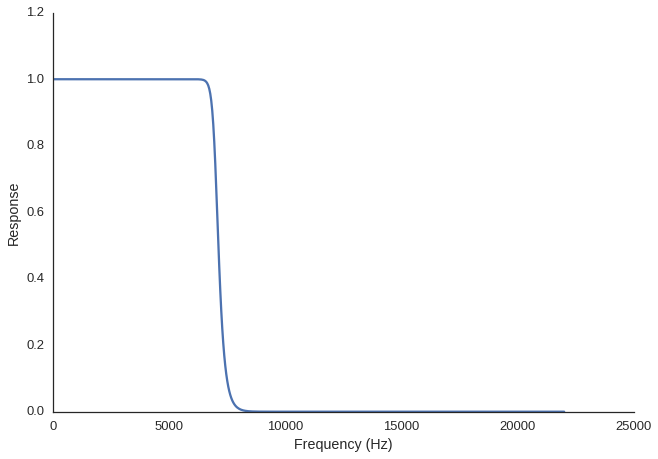

In [40]:
# plot frequency response of filter
w, h = sg.freqz(b, a)

plot((w/np.pi)*nyq, abs(h), 'Frequency (Hz)', 'Response')

fig = plt.gcf()
fig.savefig('img/filter_response.png', transparent=True)

In [6]:
x = spectrum[0]
print x

(-9.90573667032e-11+0j)


In [11]:
x.imag

0.0

Sample rate 44100
[  0.00000000e+00   2.26757370e-05   4.53514739e-05   6.80272109e-05
   9.07029478e-05   1.13378685e-04   1.36054422e-04   1.58730159e-04
   1.81405896e-04   2.04081633e-04]


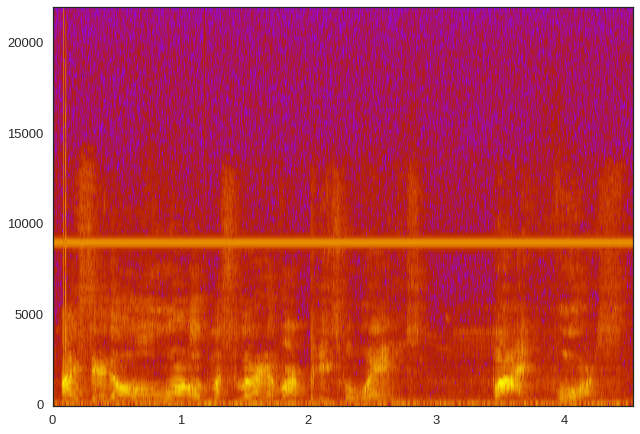

In [101]:
# Adding distortion!

fs, audio = wavfile.read('audio/bender.wav')
print 'Sample rate', fs

# audio = audio[:,0]

step_size = 1./fs
t = np.arange(0.0, 1.0, step_size)
t = np.arange(audio.shape[0], dtype=float)/fs
print t[:10]
freq0 = 9000
distort = (2**11) * np.sin(t*freq0*2*np.pi)
distort = distort.astype(int)


audio[:,0] += distort
audio[:,1] += distort
plt.specgram(audio[:,0], Fs=fs, cmap='gnuplot');
plt.autoscale(tight=True)

wavfile.write('audio/distorted_bender.wav', fs, audio)

32768


order 29
lens (30,) (30,)
order 10
lens (11,) (11,)
order 10
order 5


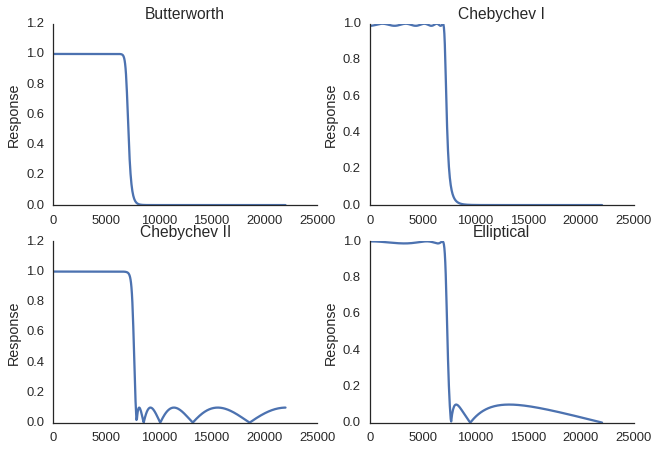

In [38]:
#exploring filter shapes!
passband = 7000. #Hz
stopband= 8000.
nyq = 0.5 * fs

#butterworth
order, normalized_cutoff = sg.buttord(passband/nyq, stopband/nyq, 3, 40)
print 'order', order
b, a = sg.butter(order, normalized_cutoff, btype='low')
print 'lens', b.shape, a.shape
w, h = sg.freqz(b, a)
plt.subplot(2,2,1)
plot((w/np.pi)*nyq, abs(h), '', 'Response')
plt.title("Butterworth")

order, normalized_cutoff = sg.cheb1ord(passband/nyq, stopband/nyq, 3, 40)
print 'order', order
b, a = sg.cheby1(order, 0.1, normalized_cutoff, btype='low')
print 'lens', b.shape, a.shape
w, h = sg.freqz(b, a)
plt.subplot(2,2,2)
plot((w/np.pi)*nyq, abs(h), '', 'Response')
plt.title("Chebychev I")


order, normalized_cutoff = sg.cheb2ord(passband/nyq, stopband/nyq, 3, 40)
print 'order', order
b, a = sg.cheby2(order, 20, normalized_cutoff, btype='low')
w, h = sg.freqz(b, a)
plt.subplot(2,2,3)
plot((w/np.pi)*nyq, abs(h), '', 'Response')
plt.title("Chebychev II")

order, normalized_cutoff = sg.ellipord(passband/nyq, stopband/nyq, 3, 40)
print 'order', order
b, a = sg.ellip(order, 0.1, 20, normalized_cutoff, btype='low')
w, h = sg.freqz(b, a)
plt.subplot(2,2,4)
plot((w/np.pi)*nyq, abs(h), '', 'Response')
plt.title("Elliptical")